In [75]:
import open3d
import pandas as pd
import numpy as np

%matplotlib inline

In [45]:
df = pd.read_csv("data_examples/test_video_mod/0000000_pointcloud.csv", header=None)
df.iloc[:, :3].to_csv("data_examples/test_video_mod/0000000_pointcloud.xyz", header=None, index=False, sep=" ")

In [46]:
df.head()

,0,1,2,3
0,773,-221,426,25
1,769,-223,424,25
2,767,-225,424,25
3,765,-227,423,25
4,767,-231,424,25


In [89]:
pcd = open3d.read_point_cloud("data_examples/test_video_mod/0000000_pointcloud.xyz")
pcd_pts = np.asarray(pcd.points)/100

In [90]:
print(pcd)

PointCloud with 37568 points.


In [91]:
print(pcd_pts)

[[ 7.73 -2.21  4.26]
 [ 7.69 -2.23  4.24]
 [ 7.67 -2.25  4.24]
 ...
 [ 3.19 -2.15  0.2 ]
 [ 3.19 -2.16  0.2 ]
 [ 3.19 -2.17  0.2 ]]


In [92]:
# open3d.draw_geometries([pcd])

In [145]:
downpcd = open3d.voxel_down_sample(pcd, voxel_size = 1.)
downpcd_pts = np.asarray(downpcd.points)

In [146]:
print(downpcd_pts)

[[  767.  -225.   403.]
 [ 2683. -1871.   779.]
 [ 2880. -1893.   804.]
 ...
 [  319.  -215.    20.]
 [  319.  -216.    20.]
 [  319.  -217.    20.]]


In [147]:
# open3d.draw_geometries([downpcd])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A5B6D84CF8>,
      dtype=object)

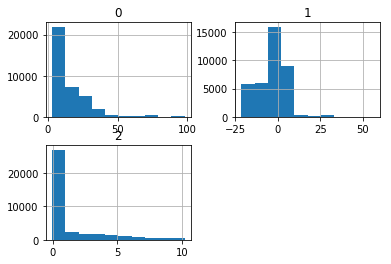

In [148]:
df_pcd = pd.DataFrame(pcd_pts)
df_pcd.iloc[:, :].hist()

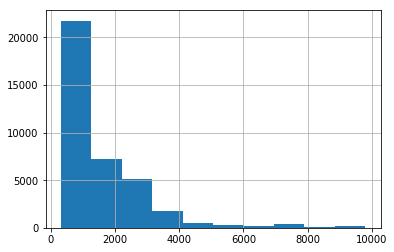

In [149]:
df_dwn = pd.DataFrame(downpcd_pts)
df_dwn.iloc[:, 0].hist()

In [150]:
pcd_pts.shape, downpcd_pts.shape

((37568, 3), (37444, 3))